# Notebook 1: Data Loading & Preprocessing (Enhanced)

This notebook handles:
- Loading Nepali news articles from CSV files
- **Loading Nepali stopwords and punctuation from dump directory**
- Text cleaning and normalization with stopword removal
- Train/test split creation
- Data statistics and visualization
- Saving processed data as JSON files

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import json
import os
import re
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Configuration and Setup

In [2]:
# Define paths
BASE_DIR = Path(r'c:\Users\sagun\Desktop\news_project')
DUMP_DIR = BASE_DIR / 'dump' / 'Nepali_news_classification-master' / 'News_Classification_Model' / 'CSV files'
RESOURCES_DIR = BASE_DIR / 'dump' / 'Nepali_news_classification-master' / 'News_Classification_Model'
DATA_DIR = BASE_DIR / 'data'
PROCESSED_DIR = DATA_DIR / 'processed'
STATS_DIR = DATA_DIR / 'stats'

# Create directories
for dir_path in [DATA_DIR, PROCESSED_DIR, STATS_DIR]:
    dir_path.mkdir(parents=True, exist_ok=True)

print(f"Base directory: {BASE_DIR}")
print(f"CSV files directory: {DUMP_DIR}")
print(f"Resources directory: {RESOURCES_DIR}")
print(f"Output directory: {PROCESSED_DIR}")
print("\n✓ Directories created successfully")

Base directory: c:\Users\sagun\Desktop\news_project
CSV files directory: c:\Users\sagun\Desktop\news_project\dump\Nepali_news_classification-master\News_Classification_Model\CSV files
Resources directory: c:\Users\sagun\Desktop\news_project\dump\Nepali_news_classification-master\News_Classification_Model
Output directory: c:\Users\sagun\Desktop\news_project\data\processed

✓ Directories created successfully


## 2. Load Nepali Stopwords and Punctuation from Dump

In [3]:
# Load Nepali stopwords from dump directory
STOPWORDS_FILE = RESOURCES_DIR / 'nepali_stopwords.txt'
PUNCTUATION_FILE = RESOURCES_DIR / 'nepali_punctuation.txt'

# Load stopwords
nepali_stopwords = set()
if STOPWORDS_FILE.exists():
    with open(STOPWORDS_FILE, 'r', encoding='utf-8') as f:
        nepali_stopwords = set(line.strip() for line in f if line.strip())
    print(f"✓ Loaded {len(nepali_stopwords)} Nepali stopwords from dump")
else:
    print("⚠ Stopwords file not found")

# Load punctuation
nepali_punctuation = set()
if PUNCTUATION_FILE.exists():
    with open(PUNCTUATION_FILE, 'r', encoding='utf-8') as f:
        nepali_punctuation = set(line.strip() for line in f if line.strip())
    print(f"✓ Loaded {len(nepali_punctuation)} Nepali punctuation marks from dump")
else:
    print("⚠ Punctuation file not found")

# Display samples
print(f"\nSample stopwords: {list(nepali_stopwords)[:10]}")
print(f"Sample punctuation: {list(nepali_punctuation)[:5]}")

# Save loaded resources for reference
resources_info = {
    'stopwords_count': len(nepali_stopwords),
    'punctuation_count': len(nepali_punctuation),
    'stopwords_file': str(STOPWORDS_FILE),
    'punctuation_file': str(PUNCTUATION_FILE)
}

with open(STATS_DIR / 'loaded_resources.json', 'w', encoding='utf-8') as f:
    json.dump(resources_info, f, ensure_ascii=False, indent=2)

print(f"\n✓ Resources info saved to {STATS_DIR / 'loaded_resources.json'}")

✓ Loaded 281 Nepali stopwords from dump
✓ Loaded 13 Nepali punctuation marks from dump

Sample stopwords: ['एक', 'दिनुभएको', 'प्लस', 'जो', 'सबैलाई', 'त्यसकारण', 'भएको', 'तिर', 'त्यसैले', 'रूप']
Sample punctuation: ['" "', "?'", ':', "''", '!']

✓ Resources info saved to c:\Users\sagun\Desktop\news_project\data\stats\loaded_resources.json


## 3. Load CSV Files

In [4]:
# Get all CSV files
csv_files = list(DUMP_DIR.glob('*.csv'))
print(f"Found {len(csv_files)} CSV files:\n")

for file in csv_files:
    print(f"  - {file.name}")

Found 17 CSV files:

  - Agriculture.csv
  - Automobiles.csv
  - Bank.csv
  - Business.csv
  - Economy.csv
  - Education.csv
  - Entertainment.csv
  - Health.csv
  - Health1.csv
  - Health2.csv
  - Politics.csv
  - Politics1.csv
  - Sports.csv
  - Technology.csv
  - Tourism.csv
  - Tourism1.csv
  - World.csv


In [5]:
# Load all CSV files into a single dataframe
all_data = []
file_stats = []

for csv_file in csv_files:
    try:
        df = pd.read_csv(csv_file, encoding='utf-8')
        
        # Get category from filename (remove .csv and numbers)
        category = csv_file.stem.replace('1', '').replace('2', '')
        
        # Add category if not present
        if 'category' not in df.columns:
            df['category'] = category
        
        all_data.append(df)
        file_stats.append({
            'file': csv_file.name,
            'category': category,
            'rows': len(df),
            'columns': list(df.columns)
        })
        
        print(f"✓ Loaded {csv_file.name}: {len(df)} articles")
    except Exception as e:
        print(f"✗ Error loading {csv_file.name}: {e}")

# Combine all dataframes
df_combined = pd.concat(all_data, ignore_index=True)
print(f"\n✓ Total articles loaded: {len(df_combined)}")
print(f"✓ Columns: {list(df_combined.columns)}")

✓ Loaded Agriculture.csv: 100 articles
✓ Loaded Automobiles.csv: 95 articles
✓ Loaded Bank.csv: 417 articles
✓ Loaded Business.csv: 89 articles
✓ Loaded Economy.csv: 100 articles
✓ Loaded Education.csv: 85 articles
✓ Loaded Entertainment.csv: 72 articles
✓ Loaded Health.csv: 31 articles
✓ Loaded Health1.csv: 10 articles
✓ Loaded Health2.csv: 53 articles
✓ Loaded Politics.csv: 50 articles
✓ Loaded Politics1.csv: 115 articles
✓ Loaded Sports.csv: 320 articles
✓ Loaded Technology.csv: 317 articles
✓ Loaded Tourism.csv: 43 articles
✓ Loaded Tourism1.csv: 115 articles
✓ Loaded World.csv: 122 articles

✓ Total articles loaded: 2134
✓ Columns: ['text', 'category']


## 4. Data Exploration

In [6]:
# Display basic information
print("Dataset Shape:", df_combined.shape)
print("\nColumn Names:")
print(df_combined.columns.tolist())
print("\nFirst few rows:")
df_combined.head()

Dataset Shape: (2134, 2)

Column Names:
['text', 'category']

First few rows:


,text,category
0,﻿काठमाडौंमा पहिलो पटक स्ट्रबेरीको व्यवसायिक खे...,Agriculture
1,"जिल्लाका किसानले लगाएको अदुवामा गानो कुहिने, ग...",Agriculture
2,काभ्रेपलाञ्चोकमा कृषकले एसआरआई प्रविधिमा गरेको...,Agriculture
3,राजधानीमा यतिबेला तरकारीको मूल्य आकासिएको छ। क...,Agriculture
4,पाल पोल्ट्री तथा लाइभस्टक क्षेत्रको समग्र विका...,Agriculture


In [7]:
# Check for missing values
print("Missing Values:")
print(df_combined.isnull().sum())
print(f"\nTotal missing values: {df_combined.isnull().sum().sum()}")

Missing Values:
text        0
category    0
dtype: int64

Total missing values: 0


Category Distribution:

category
bank             417
sports           320
technology       317
politic          165
tourism          158
world            122
Agriculture      100
economy          100
automobiles       95
health            94
business          89
education         85
entertainment     72
Name: count, dtype: int64


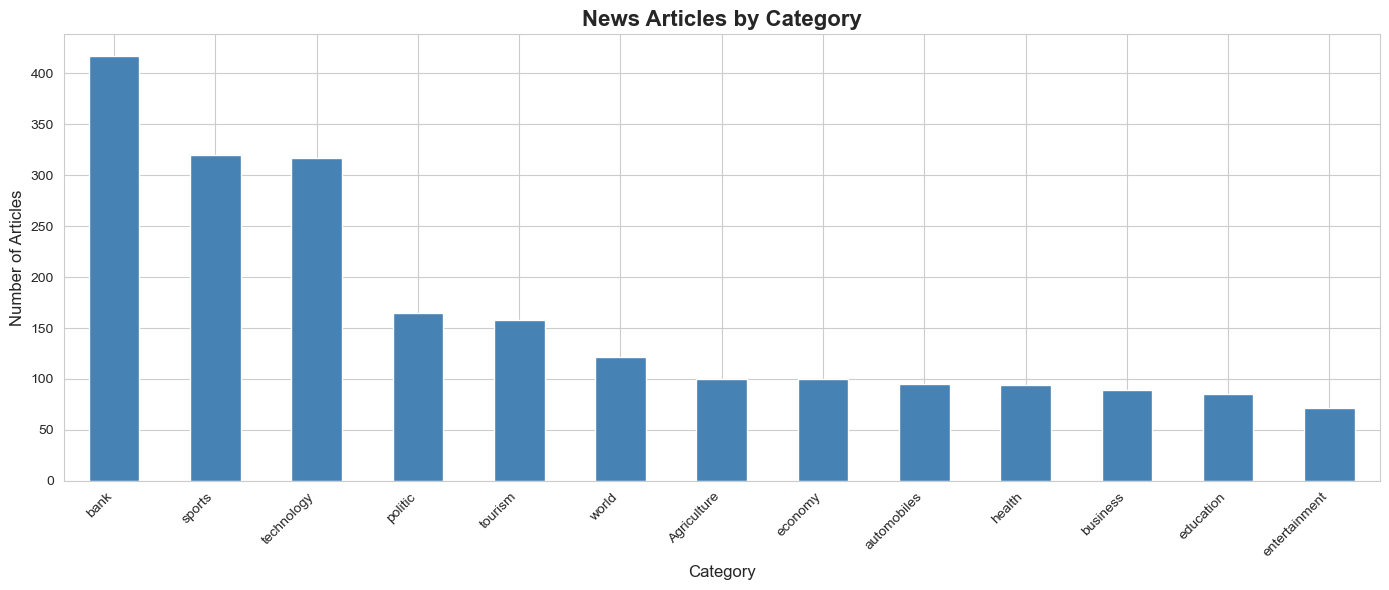


✓ Chart saved to c:\Users\sagun\Desktop\news_project\data\stats\category_distribution.png


In [8]:
# Category distribution
category_counts = df_combined['category'].value_counts()
print("Category Distribution:\n")
print(category_counts)

# Visualize category distribution
plt.figure(figsize=(14, 6))
category_counts.plot(kind='bar', color='steelblue')
plt.title('News Articles by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(STATS_DIR / 'category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Chart saved to {STATS_DIR / 'category_distribution.png'}")

## 5. Text Cleaning and Preprocessing with Stopword Removal

In [9]:
def clean_nepali_text(text, remove_stopwords=False, remove_punctuation=False):
    """
    Clean Nepali text by removing unwanted characters and normalizing
    
    Args:
        text: Input text
        remove_stopwords: Whether to remove Nepali stopwords (from dump)
        remove_punctuation: Whether to remove Nepali punctuation (from dump)
    """
    if pd.isna(text):
        return ""
    
    # Convert to string
    text = str(text)
    
    # Remove BOM character
    text = text.replace('\ufeff', '')
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove Nepali punctuation if requested
    if remove_punctuation and nepali_punctuation:
        for punct in nepali_punctuation:
            if punct:  # Skip empty strings
                text = text.replace(punct, ' ')
    
    # Remove stopwords if requested
    if remove_stopwords and nepali_stopwords:
        words = text.split()
        words = [w for w in words if w not in nepali_stopwords]
        text = ' '.join(words)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Test the function with different options
sample_text = df_combined['text'].iloc[0]
print("Original text (first 200 chars):")
print(sample_text[:200])
print("\n" + "="*80)

print("\nBasic cleaning (first 200 chars):")
cleaned_basic = clean_nepali_text(sample_text)
print(cleaned_basic[:200])
print("\n" + "="*80)

print("\nWith stopword removal (first 200 chars):")
cleaned_no_stop = clean_nepali_text(sample_text, remove_stopwords=True)
print(cleaned_no_stop[:200])
print("\n" + "="*80)

print("\nWith stopword + punctuation removal (first 200 chars):")
cleaned_full = clean_nepali_text(sample_text, remove_stopwords=True, remove_punctuation=True)
print(cleaned_full[:200])

Original text (first 200 chars):
﻿काठमाडौंमा पहिलो पटक स्ट्रबेरीको व्यवसायिक खेती सुरु भएको छ । एक दशकसम्म इजरायली कृषि फार्ममा बसेर काम गरेका श्रीकृष्ण अधिकारीले तारकेश्वर नगरपालिका ४ गोलढुंगामा उत्पादन सुरु गरेका हुन्।
यसअघि स्ट्रब


Basic cleaning (first 200 chars):
काठमाडौंमा पहिलो पटक स्ट्रबेरीको व्यवसायिक खेती सुरु भएको छ । एक दशकसम्म इजरायली कृषि फार्ममा बसेर काम गरेका श्रीकृष्ण अधिकारीले तारकेश्वर नगरपालिका ४ गोलढुंगामा उत्पादन सुरु गरेका हुन्। यसअघि स्ट्रबे


With stopword removal (first 200 chars):
काठमाडौंमा स्ट्रबेरीको व्यवसायिक खेती सुरु । दशकसम्म इजरायली कृषि फार्ममा बसेर काम श्रीकृष्ण अधिकारीले तारकेश्वर नगरपालिका ४ गोलढुंगामा उत्पादन सुरु हुन्। यसअघि स्ट्रबेरी नुवाकोटमा गरिँदै आएको थियो। अ


With stopword + punctuation removal (first 200 chars):
काठमाडौंमा स्ट्रबेरीको व्यवसायिक खेती सुरु । दशकसम्म इजरायली कृषि फार्ममा बसेर काम श्रीकृष्ण अधिकारीले तारकेश्वर नगरपालिका ४ गोलढुंगामा उत्पादन सुरु हुन्। यसअघि स्ट्रबेरी नुवाकोटमा गरिँदै आएको थियो। अ


In [10]:
# Apply cleaning to all text (basic cleaning for now, preserving stopwords for context)
print("Cleaning text data...")
df_combined['text_cleaned'] = df_combined['text'].apply(lambda x: clean_nepali_text(x, remove_stopwords=False))

# Also create a version with stopwords removed for comparison
df_combined['text_no_stopwords'] = df_combined['text'].apply(lambda x: clean_nepali_text(x, remove_stopwords=True))

# Remove empty texts
df_combined = df_combined[df_combined['text_cleaned'].str.len() > 10]

print(f"✓ Text cleaned successfully")
print(f"✓ Remaining articles after removing empty texts: {len(df_combined)}")

# Show comparison
print("\nComparison of cleaning methods:")
sample_idx = 0
print(f"\nOriginal length: {len(df_combined.iloc[sample_idx]['text'])} chars")
print(f"Cleaned length: {len(df_combined.iloc[sample_idx]['text_cleaned'])} chars")
print(f"No stopwords length: {len(df_combined.iloc[sample_idx]['text_no_stopwords'])} chars")

Cleaning text data...
✓ Text cleaned successfully
✓ Remaining articles after removing empty texts: 2134

Comparison of cleaning methods:

Original length: 2350 chars
Cleaned length: 2346 chars
No stopwords length: 1999 chars


In [11]:
# Calculate text statistics
df_combined['text_length'] = df_combined['text_cleaned'].str.len()
df_combined['word_count'] = df_combined['text_cleaned'].str.split().str.len()
df_combined['word_count_no_stop'] = df_combined['text_no_stopwords'].str.split().str.len()

print("Text Statistics:")
print(f"  Average text length: {df_combined['text_length'].mean():.2f} characters")
print(f"  Average word count: {df_combined['word_count'].mean():.2f} words")
print(f"  Average word count (no stopwords): {df_combined['word_count_no_stop'].mean():.2f} words")
print(f"  Min text length: {df_combined['text_length'].min()} characters")
print(f"  Max text length: {df_combined['text_length'].max()} characters")

# Calculate stopword reduction percentage
stopword_reduction = (1 - df_combined['word_count_no_stop'].mean() / df_combined['word_count'].mean()) * 100
print(f"\n  Stopword reduction: {stopword_reduction:.1f}%")

Text Statistics:
  Average text length: 1794.19 characters
  Average word count: 281.26 words
  Average word count (no stopwords): 226.88 words
  Min text length: 36 characters
  Max text length: 11022 characters

  Stopword reduction: 19.3%


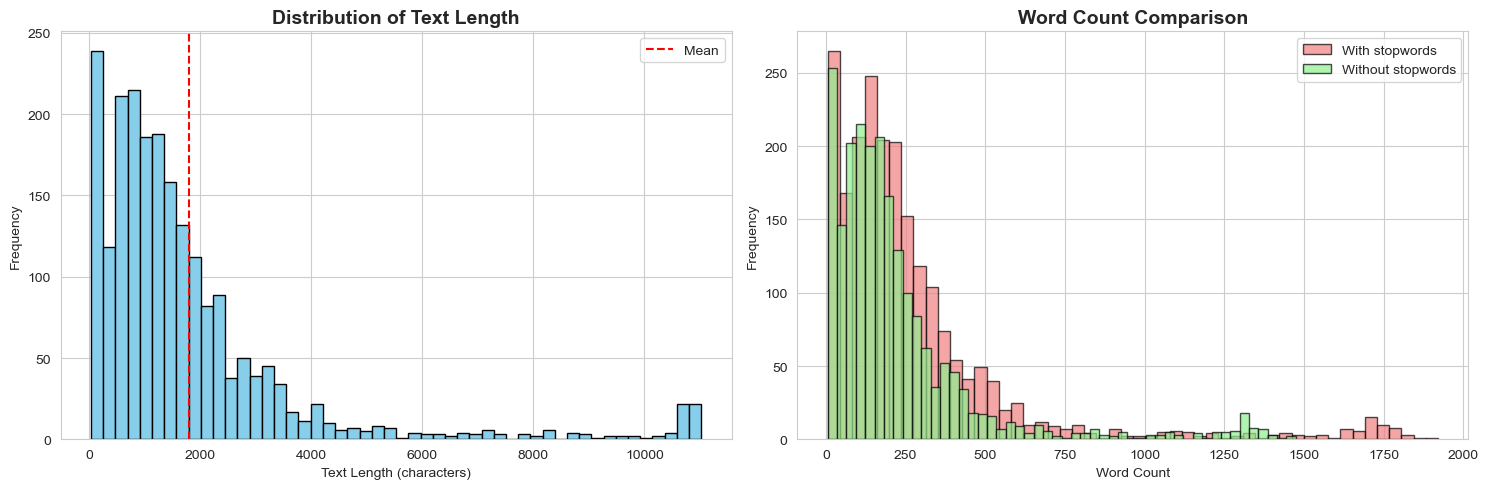

✓ Chart saved to c:\Users\sagun\Desktop\news_project\data\stats\text_statistics.png


In [12]:
# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Text length distribution
axes[0].hist(df_combined['text_length'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Text Length', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Text Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df_combined['text_length'].mean(), color='red', linestyle='--', label='Mean')
axes[0].legend()

# Word count comparison
axes[1].hist(df_combined['word_count'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black', label='With stopwords')
axes[1].hist(df_combined['word_count_no_stop'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black', label='Without stopwords')
axes[1].set_title('Word Count Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.savefig(STATS_DIR / 'text_statistics.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Chart saved to {STATS_DIR / 'text_statistics.png'}")

## 6. Train/Test Split

In [13]:
# Prepare data for splitting (using cleaned text with stopwords for better context)
df_final = df_combined[['text_cleaned', 'category']].copy()
df_final.columns = ['text', 'category']

# Remove duplicates
df_final = df_final.drop_duplicates(subset=['text'])
print(f"Articles after removing duplicates: {len(df_final)}")

# Stratified split to maintain category distribution
train_df, test_df = train_test_split(
    df_final,
    test_size=0.2,
    random_state=42,
    stratify=df_final['category']
)

print(f"\n✓ Train set size: {len(train_df)} articles")
print(f"✓ Test set size: {len(test_df)} articles")
print(f"\nTrain set category distribution:")
print(train_df['category'].value_counts())
print(f"\nTest set category distribution:")
print(test_df['category'].value_counts())

Articles after removing duplicates: 1789

✓ Train set size: 1431 articles
✓ Test set size: 358 articles

Train set category distribution:
category
bank             332
sports           166
politic          132
tourism          126
world             98
technology        92
economy           80
Agriculture       78
automobiles       76
business          71
education         68
entertainment     58
health            54
Name: count, dtype: int64

Test set category distribution:
category
bank             83
sports           42
politic          33
tourism          32
world            24
technology       23
economy          20
automobiles      19
Agriculture      19
business         18
education        17
health           14
entertainment    14
Name: count, dtype: int64


## 7. Save Processed Data

In [14]:
# Convert to JSON format
train_data = train_df.to_dict('records')
test_data = test_df.to_dict('records')

# Save as JSON files
with open(PROCESSED_DIR / 'train_data.json', 'w', encoding='utf-8') as f:
    json.dump(train_data, f, ensure_ascii=False, indent=2)

with open(PROCESSED_DIR / 'test_data.json', 'w', encoding='utf-8') as f:
    json.dump(test_data, f, ensure_ascii=False, indent=2)

print(f"✓ Train data saved to {PROCESSED_DIR / 'train_data.json'}")
print(f"✓ Test data saved to {PROCESSED_DIR / 'test_data.json'}")

✓ Train data saved to c:\Users\sagun\Desktop\news_project\data\processed\train_data.json
✓ Test data saved to c:\Users\sagun\Desktop\news_project\data\processed\test_data.json


In [15]:
# Save data statistics
stats = {
    'total_articles': len(df_final),
    'train_size': len(train_df),
    'test_size': len(test_df),
    'num_categories': df_final['category'].nunique(),
    'categories': df_final['category'].unique().tolist(),
    'category_distribution': df_final['category'].value_counts().to_dict(),
    'avg_text_length': float(df_combined['text_length'].mean()),
    'avg_word_count': float(df_combined['word_count'].mean()),
    'avg_word_count_no_stopwords': float(df_combined['word_count_no_stop'].mean()),
    'stopword_reduction_percent': float(stopword_reduction),
    'min_text_length': int(df_combined['text_length'].min()),
    'max_text_length': int(df_combined['text_length'].max()),
    'resources_loaded': {
        'stopwords': len(nepali_stopwords),
        'punctuation': len(nepali_punctuation)
    }
}

with open(STATS_DIR / 'data_summary.json', 'w', encoding='utf-8') as f:
    json.dump(stats, f, ensure_ascii=False, indent=2)

print(f"✓ Statistics saved to {STATS_DIR / 'data_summary.json'}")

✓ Statistics saved to c:\Users\sagun\Desktop\news_project\data\stats\data_summary.json


## 8. Summary

In [16]:
print("="*60)
print("DATA PREPROCESSING SUMMARY")
print("="*60)
print(f"\n📚 Resources Loaded from Dump:")
print(f"  • Nepali stopwords: {len(nepali_stopwords)}")
print(f"  • Nepali punctuation: {len(nepali_punctuation)}")
print(f"\n📊 Dataset Statistics:")
print(f"  • Total articles: {stats['total_articles']}")
print(f"  • Training set: {stats['train_size']} (80%)")
print(f"  • Test set: {stats['test_size']} (20%)")
print(f"  • Number of categories: {stats['num_categories']}")
print(f"\n📝 Text Statistics:")
print(f"  • Average text length: {stats['avg_text_length']:.0f} characters")
print(f"  • Average word count: {stats['avg_word_count']:.0f} words")
print(f"  • Average word count (no stopwords): {stats['avg_word_count_no_stopwords']:.0f} words")
print(f"  • Stopword reduction: {stats['stopword_reduction_percent']:.1f}%")
print(f"  • Text length range: {stats['min_text_length']} - {stats['max_text_length']} characters")
print(f"\n📁 Output Files:")
print(f"  • {PROCESSED_DIR / 'train_data.json'}")
print(f"  • {PROCESSED_DIR / 'test_data.json'}")
print(f"  • {STATS_DIR / 'data_summary.json'}")
print(f"  • {STATS_DIR / 'loaded_resources.json'}")
print(f"  • {STATS_DIR / 'category_distribution.png'}")
print(f"  • {STATS_DIR / 'text_statistics.png'}")
print("\n✅ Data preprocessing completed successfully!")
print("   Using resources from dump directory for authentic Nepali NLP")
print("="*60)

DATA PREPROCESSING SUMMARY

📚 Resources Loaded from Dump:
  • Nepali stopwords: 281
  • Nepali punctuation: 13

📊 Dataset Statistics:
  • Total articles: 1789
  • Training set: 1431 (80%)
  • Test set: 358 (20%)
  • Number of categories: 13

📝 Text Statistics:
  • Average text length: 1794 characters
  • Average word count: 281 words
  • Average word count (no stopwords): 227 words
  • Stopword reduction: 19.3%
  • Text length range: 36 - 11022 characters

📁 Output Files:
  • c:\Users\sagun\Desktop\news_project\data\processed\train_data.json
  • c:\Users\sagun\Desktop\news_project\data\processed\test_data.json
  • c:\Users\sagun\Desktop\news_project\data\stats\data_summary.json
  • c:\Users\sagun\Desktop\news_project\data\stats\loaded_resources.json
  • c:\Users\sagun\Desktop\news_project\data\stats\category_distribution.png
  • c:\Users\sagun\Desktop\news_project\data\stats\text_statistics.png

✅ Data preprocessing completed successfully!
   Using resources from dump directory for aut